Type count of agents to create : 10
State: 0, present [None, None]
State: 2, present [None, None]
State: 0, present [None, None]
State: 4, present [None, None]
State: 1, present [None, None]
State: 3, present [None, None]
State: 2, present [None, None]
State: 3, present [None, None]
State: 3, present [None, None]
State: 5, present [None, None]
State: 0, present [None, None]
State: 2, present [None, None]
State: 0, present [None, None]
State: 4, present [None, None]
State: 1, present [None, None]
State: 3, present [None, None]
State: 2, present [None, None]
State: 3, present [None, None]
State: 3, present [None, None]
State: 5, present [None, None]
State: 5, present [0, 5]
State: 5, present [2, 5]
State: 2, present [0, 2]
State: 5, present [4, 5]
State: 6, present [1, 6]
State: 6, present [3, 6]
State: 0, present [2, 0]
State: 6, present [3, 6]
State: 6, present [3, 6]
State: 0, present [5, 0]
State: 4, present [5, 4]
State: 2, present [5, 2]
State: 3, present [2, 3]
State: 2, present [

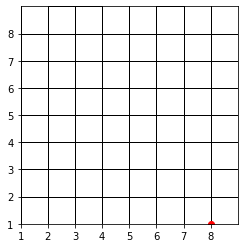

In [2]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

agents = []
q_array = [[0 for _ in range(8)] for _ in range(8)]
q_array[6][7] = 100
q_array[7][7] = 100
r_array = [[-1, 0, 0, -1, -1, 0, -1, -1],
           [0, -1, 0, 0, -1, -1, 0, -1],
           [0, 0, -1, 0, -1, 0, -1, -1],
           [-1, 0, 0, -1, 0, -1, 0, -1],
           [-1, -1, -1, 0, -1, 0, -1, -1],
           [0, -1, 0, -1, 0, -1, -1, -1],
           [-1, 0, -1, 0, -1, -1, -1, 100],
           [-1, -1, -1, -1, -1, -1, 0, 100]
          ]


class Agent:       
    def __init__ (self, state = None):
        if state is None:
            self.state = random.randint(0, 7)
        else:
            self.state = state
        self.present = [None, None]
        
    def display_info (self):
        print(f"State: {self.state}, present {self.present}")

        
def visualize_labyrinth():
    fig, ax = plt.subplots()
    ax.set_xlim([0, 8])
    ax.set_ylim([0, 8])
    ax.set_xticks(range(8))
    ax.set_yticks(range(8))
    ax.set_xticklabels(range(1, 9))
    ax.set_yticklabels(range(1, 9))
    ax.set_aspect('equal')
    ax.grid(color='black', linewidth=1)

    for i in range(8):
        for j in range(8):
            if r_array[i][j] >= 0:
                ax.add_patch(patches.Rectangle((j, 7-i), 1, 1, facecolor='none', edgecolor='black'))

    ax.plot([agents[0].present[1]], [7-agents[0].present[0]], marker='o', color='red')

    plt.show()

def create_agents():
    agents_count = int(input("Type count of agents to create : ")) 
    for _ in range(agents_count):
        agent = Agent()
        agents.append(agent)
        
def possible_options(x):
    options = []
    max_value = -1
    max_X = 0
    max_y = 0
    for y in range(8):
        if r_array[x][y] >= 0: 
            options.append([x, y])
            if max_value < q_array[x][y]:
                max_value = q_array[x][y]
                max_X = x
                max_y = y
    if max_value == 0:
        return options
    else :
        options = []
        options.append([max_X, max_y])
        return options
        

def evaluetion(obj):
    Q = q_array[obj.present[0]][obj.present[1]]
    R = r_array[obj.present[0]][obj.present[1]]
    options = []
    for i in possible_options(obj.state):
        options.append(q_array[i[0]][i[1]])
    MaxQ = max(options)
    Q = R + 0.8 * MaxQ
    return Q
    

def learning(agents):
    steps_count = 0
    mark = True
    while mark: 
        #step
        for obj in agents: 
            obj.display_info()
            options = possible_options(obj.state)
            obj.present = random.choice(options)
            obj.state = obj.present[1]  

            #evaluation
            q_array[obj.present[0]][obj.present[1]] = evaluetion(obj)

            if obj.state == 7 and obj.present == [7, 7]:
                if len(agents)==1:
                    mark = False
                    break
                agents = [agent for agent in agents if agent.state != 7 and agent.present != [7, 7]]
        steps_count+=1
    print(f"Max Count of steps: {steps_count}")   
        

        
        
    
create_agents()  
for obj in agents:
    obj.display_info()
start_time = time.perf_counter()

learning(agents)
end_time = time.perf_counter()
elapsed_time = end_time - start_time

print(f"Wasted time of learning: {elapsed_time:.6f} seconds")
    
for row in q_array:
    rounded_numbers = list(map(round, row, [2]*len(row)))
    print(rounded_numbers)

print("Testing step")
x = int(input("Enter location (room) of new agent: "))
agent = Agent(x)
agents = []
agents.append(agent)

start_time = time.perf_counter()
learning(agents)
end_time = time.perf_counter()
elapsed_time = end_time - start_time

print(f"Wasted time of test: {elapsed_time:.6f} seconds")

visualize_labyrinth()

In [46]:


state = random.randint(0, 7)
state

0

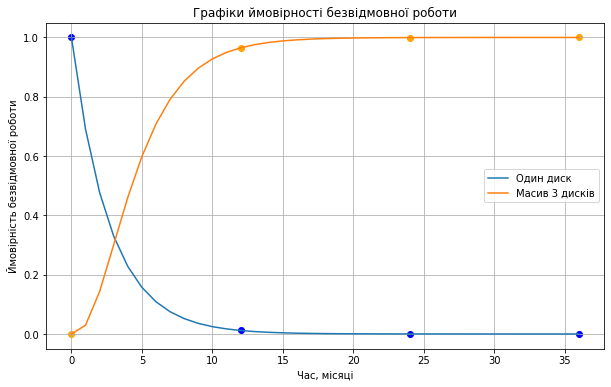

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для розрахунку ймовірності безвідмовної роботи для одного диска
def reliability_single_disk(t, lambda_val):
    return np.exp(-lambda_val * t)

# Функція для розрахунку ймовірності безвідмовної роботи для масиву дисків
def reliability_disk_array(t, lambda_val, num_disks):
    return np.prod([1 - reliability_single_disk(t, lambda_val) for _ in range(num_disks)])

# Задані параметри
lambda_val = 0.37
num_disks = 3  # Кількість дисків у масиві

# Інтервал часу в місяцях
time_interval = np.arange(0, 37, 1)

# Розрахунок ймовірності безвідмовної роботи для одного диска
reliability_single = [reliability_single_disk(t, lambda_val) for t in time_interval]

# Розрахунок ймовірності безвідмовної роботи для масиву дисків
reliability_array = [reliability_disk_array(t, lambda_val, num_disks) for t in time_interval]

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(time_interval, reliability_single, label='Один диск')
plt.plot(time_interval, reliability_array, label=f'Масив {num_disks} дисків')
plt.scatter(np.arange(0, 37, 12), reliability_single[::12], color='blue')  # Відмітки для одного диска
plt.scatter(np.arange(0, 37, 12), reliability_array[::12], color='orange')  # Відмітки для масиву дисків

# Налаштування графіка
plt.title('Графіки ймовірності безвідмовної роботи')
plt.xlabel('Час, місяці')
plt.ylabel('Ймовірність безвідмовної роботи')
plt.legend()
plt.grid(True)
plt.show()